# ANOVA  
## Comparação de Médias - Teste F - ANOVA

### Comportamento da Hemoglobina Glicosilada em Gestantes

1. Descrição do Estudo: A dosagem da hemoglobina glicosilada (HbA) é uma ferramenta importante para o acompanhamento de gestantes com diabetes. Sabe-se que o risco de defeitos congênitos aumenta quando a mae possui diabetes. Entretanto, acredita-se que com um acompanhamento adequado, a gestante aumenta o risco de ter um bebê saudável.  
2. Um estudo transversal foi conduzido para comparar três grupos de gestantes com relação ao comportamento da hemoglobina glicosilada (HbA):  
• Gestantes Normais (N);  
• Gestantes com Tolerância Diminuida (TD);  
• Gestantes Diabéticas (D).  
Dez gestantes participaram em cada grupo.  
3. O objetivo do estudo é investigar se a HbA consegue separar os três grupos de gestantes. Ou seja, os grupos foram definidos utilizando critérios clínicos bem específicos e deseja-se compará-los com relação à HbA.

___

## Leitura dos Dados

In [1]:
#Biblioteca Researchpy (análises/informações univariadas e bivariadas)
#pip install researchpy
import researchpy as rp

#Biblioteca Pandas (manipulação e análise de dados)
import pandas as pd 

#Biblioteca Matplotlib (criação de gráficos e visualizações de dados em geral)
import matplotlib.pyplot as plt

#Biblioteca Seaborn (interface de alto nível para construção de gráficos estatísticos atrativos e informativos)
import seaborn as sns

In [2]:
#Banco de dados
df = pd.read_csv('http://www.est.ufmg.br/~enricoc/pdf/avancados_medicina/dadosexerc1.txt', delimiter='\t') 

In [3]:
#Leitura das 5 primeiras linhas
df.head() 

,Hba,Grupo
0,7.86,1
1,6.38,1
2,6.90,1
3,7.78,1
4,8.17,1


In [4]:
#Informações df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hba     30 non-null     float64
 1   Grupo   30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
#Dados faltantes
df.isnull().sum()

Hba      0
Grupo    0
dtype: int64

In [6]:
#Recodificando variável grupo
df['Grupo'].replace({1: '1.Gestantes Normais', 2: '2.Gestantes com Tolerância Diminuida', 
                     3: '3.Gestantes Diabéticas'}, inplace= True) 

In [7]:
#Leitura das 5 primeiras linhas
df.head() 

,Hba,Grupo
0,7.86,1.Gestantes Normais
1,6.38,1.Gestantes Normais
2,6.90,1.Gestantes Normais
3,7.78,1.Gestantes Normais
4,8.17,1.Gestantes Normais


In [8]:
#Informações df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hba     30 non-null     float64
 1   Grupo   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


## Análise Descritiva

In [9]:
round(rp.summary_cont(df['Hba']), 2)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Hba,30.0,8.02,1.17,0.21,7.59,8.46


In [10]:
df.describe().round(2)

,Hba
count,30.00
mean,8.02
std,1.17
min,6.20
25%,7.42
50%,7.86
75%,8.64
max,10.43


In [11]:
round(rp.summary_cont(df['Hba'].groupby(df['Grupo'])), 2)

,N,Mean,SD,SE,95% Conf.,Interval
Grupo,,,,,,
1.Gestantes Normais,10,7.36,0.85,0.27,6.75,7.96
2.Gestantes com Tolerância Diminuida,10,7.45,0.72,0.23,6.93,7.96
3.Gestantes Diabéticas,10,9.27,0.76,0.24,8.73,9.82


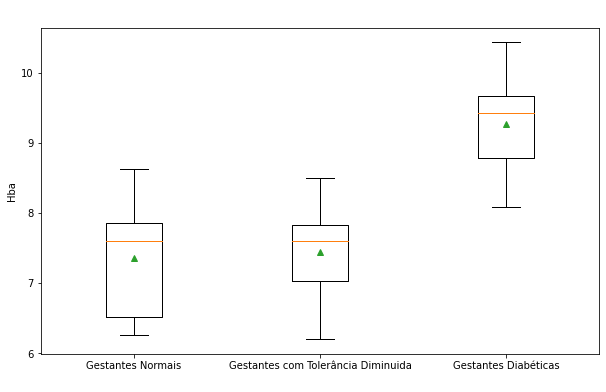

In [12]:
#Boxplot

fig = plt.figure(figsize = (10, 6)) ##cria um objeto de figura
ax = fig.add_subplot(111) #cria um objeto de eixos na figura

ax.set_title(" ", fontsize = 20)
ax.set

data = (df['Hba'][df['Grupo'] == '1.Gestantes Normais'],
        df['Hba'][df['Grupo'] == '2.Gestantes com Tolerância Diminuida'],
        df['Hba'][df['Grupo'] == '3.Gestantes Diabéticas'])

ax.boxplot(data,
           labels= ['Gestantes Normais', 'Gestantes com Tolerância Diminuida', 'Gestantes Diabéticas'],
           showmeans = True)

plt.xlabel(" ")
plt.ylabel("Hba")

plt.show()

## Análise de Variância

In [13]:
#scipy.stats (Módulo de funções estatísticas)
import scipy.stats as stats

stats.f_oneway(df['Hba'][df['Grupo'] == '1.Gestantes Normais'],
               df['Hba'][df['Grupo'] == '2.Gestantes com Tolerância Diminuida'],
               df['Hba'][df['Grupo'] == '3.Gestantes Diabéticas'])

F_onewayResult(statistic=19.364025499068692, pvalue=6.078209006531465e-06)

In [14]:
#statsmodels.api (Módulo que fornece classes e funções para a estimativa de modelos estatísticos)
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Tabela ANOVA
model = ols('Hba ~ C(Grupo)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

#Nota: C (grupo) = entre as amostras e residuos = dentro das amostras

,sum_sq,df,F,PR(>F)
C(Grupo),23.40306,2.0,19.364025,0.000006
Residual,16.31589,27.0,NaN,NaN


In [15]:
#A função abaixo foi criada para os resultados da tabela ANOVA unilateral retornados para a soma dos quadrados do Tipo II
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Grupo),23.40306,2.0,11.701530,19.364025,0.000006,0.589216,0.550414
Residual,16.31589,27.0,0.604292,NaN,NaN,NaN,NaN


### Interpretação
O objetivo do estudo foi investigar se a HbA consegue separar os três grupos de gestantes. Ou seja, os grupos foram definidos utilizando critérios clínicos bem específicos e deseja-se compará-los com relação à HbA.  
A Hba médio geral foi de 8,0 IC95% (7,6; 8,4) com médias de grupo de 9,3 IC95% (8,7; 9,89) para o grupo de Gestantes Diabéticas; 7,36 IC95% (6,8; 7,9) para o grupo de Gestantes Normais; e 7,5 IC95% (6,9; 7,9) para o grupo de Gestantes com Tolerância Diminuida.  
Há uma diferença estatisticamente significativa entre os grupos e a Hba ao **nivel de 5% de significância**, F = 19,36, valor de p = 0.000006, efeito geral= 0,55.  
Para saber quais grupos diferiram significativamente, testes post-hoc precisam ser realizados. Antes de realizar esse trabalho, as premissas devem ser verificadas primeiro, caso seja necessário fazer alguma modificação no modelo.

## Verificação de Suposição

### INDEPENDÊNCIA
Esta suposição é testada quando o estudo é desenhado. O que isso significa é que todos os grupos são mutuamente exclusivos, ou seja, um indivíduo só pode pertencer a um grupo. Além disso, isso significa que os dados não são medidas repetidas (não são coletados ao longo do tempo). Neste exemplo, essa condição foi atendida.

### NORMALIDADE
A suposição de normalidade é testada nos resíduos do modelo ao vir de uma ANOVA ou estrutura de regressão. Um método para testar a suposição de normalidade é o teste de Shapiro-Wilk. Isso pode ser concluído usando o método shapiro() de scipy.stats. Infelizmente, a saída não é rotulada, mas é (estatística de teste W, valor p).

In [16]:
#Teste de Shapiro-Wilk
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9316665530204773, pvalue=0.05438007786870003)

**O teste não é significativo, W = 0,93 p = 0,054, o que indica que os resíduos estão normalmente distribuídos.**

Outra forma de testar a suposição é por meio de uma verificação visual - isso é útil quando a amostra é grande. A razão disso ser verdade é que, à medida que o tamanho da amostra aumenta, a capacidade do teste estatístico de rejeitar a hipótese nula aumenta, ou seja, ele ganha poder para detectar diferenças menores à medida que o tamanho da amostra n aumenta.

Um método de verificar visualmente a distribuição é usar um gráfico de probabilidade com ou sem o valor de correlação, para avaliar a correlação dos valores observados com a distribuição teórica em questão - no caso atual seria a distribuição gaussiana (também conhecida como normal). Isso pode ser concluído usando o método probplot() de scipy.stats.

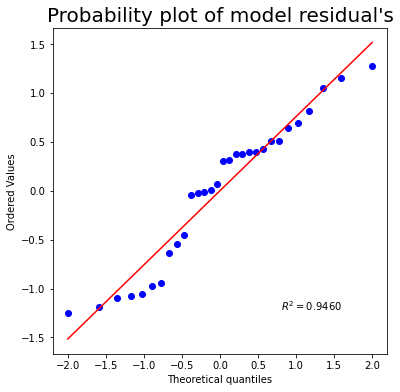

In [17]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot = plt, rvalue = True)
ax.set_title("Probability plot of model residual's", fontsize = 20)
ax.set

plt.show()

### HOMOGENEIDADE DE VARIÂNCIA
A suposição final é que todos os grupos têm variâncias iguais. Um método para testar essa suposição é o teste de Levene de homogeneidade de variâncias. Isso pode ser concluído usando o método levene() de scipy.stats.

In [18]:
#Teste de Levene
stats.levene(df['Hba'][df['Grupo'] == '1.Gestantes Normais'],
             df['Hba'][df['Grupo'] == '2.Gestantes com Tolerância Diminuida'],
             df['Hba'][df['Grupo'] == '3.Gestantes Diabéticas'])

LeveneResult(statistic=0.2905937598540962, pvalue=0.7501288054472516)

**O teste de Levene de homogeneidade de variâncias não é significativo, o que indica que os grupos apresentam diferença não estatisticamente significativa em sua variância. Novamente, pode valer a pena verificar essa suposição visualmente também.**

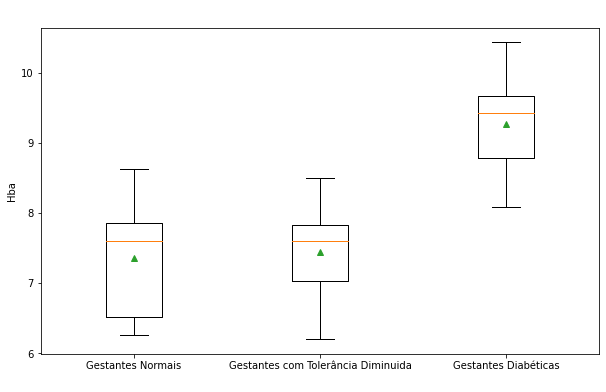

In [19]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.set_title(" ", fontsize = 20)
ax.set

data = (df['Hba'][df['Grupo'] == '1.Gestantes Normais'],
        df['Hba'][df['Grupo'] == '2.Gestantes com Tolerância Diminuida'],
        df['Hba'][df['Grupo'] == '3.Gestantes Diabéticas'])

ax.boxplot(data,
           labels= ['Gestantes Normais', 'Gestantes com Tolerância Diminuida', 'Gestantes Diabéticas'],
           showmeans = True)

plt.xlabel(" ")
plt.ylabel("Hba")

plt.show()

O teste gráfico de homogeneidade de variâncias apóia os resultados do teste estatístico em que os grupos têm variâncias iguais.   

Por padrão, os gráficos de caixa mostram a mediana (linha laranja no gráfico acima). O triângulo verde é a média para cada grupo, que foi um argumento adicional que foi passado para o método.  

Existem diferentes maneiras de lidar com a heteroscedasticidade (variância desigual) e uma decisão precisa ser tomada. Algumas opções incluem, mas não estão limitadas a, transformar a variável dependente (resultado), podem usar médias aparadas, erros padrão robustos ou usar um teste paramétrico, como o teste t de Welch.  

## TESTE POST-HOC
Ao conduzir testes post-hoc ou comparações planejadas, permite-se ver quais grupos diferem significativamente entre si; lembre-se de que a ANOVA é um teste abrangente!  
Existem algumas abordagens diferentes que podem ser adotadas durante a realização desses testes, as que são implementadas em StatsModels atualmente são:  

• Diferença Honestamente Significativa de Tukey (HSD)  
• Bonferroni  
• Šidák (também conhecido como Dunn-Šidák)

### DIFERENÇA HONESTAMENTE SIGNIFICATIVA DE TUKEY (HSD)

In [20]:
#Teste de Tukey

#statsmodels.stats.multicomp (calcula as comparações de pares com intervalos de confiança TukeyHSD)
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['Hba'], df['Grupo'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.Gestantes Normais,2.Gestantes com Tolerância Diminuida,0.09,0.9,-0.7718,0.9518,False
1.Gestantes Normais,3.Gestantes Diabéticas,1.917,0.001,1.0552,2.7788,True
2.Gestantes com Tolerância Diminuida,3.Gestantes Diabéticas,1.827,0.001,0.9652,2.6888,True


No topo, as informações de teste da tabela são fornecidas.  

**FWER** é a taxa de erro familiar, ou seja, o que está sendo definido e controlado nas  
colunas **grupo1** e **grupo2** que são os grupos sendo comparados  
**meandiff** é a diferença entre as médias do grupo  
**p-adj** é o valor p corrigido que leva em consideração as múltiplas comparações sendo conduzidas  
**lower** é a banda inferior do intervalo de confiança. No exemplo atual, o intervalo de confiança no nível de 95%, alfa = 0,05  
**upper** é a banda superior do intervalo de confiança. No exemplo atual, o intervalo de confiança no nível de 95%, alfa = 0,05  
**reject** é a regra de decisão com base no valor p corrigido  

C:\Users\Amanda\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


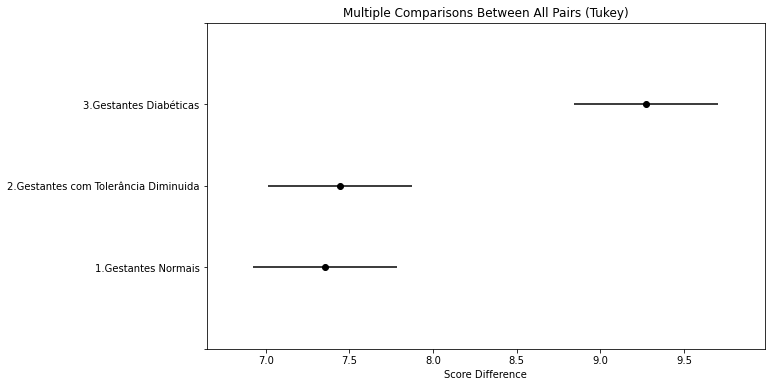

In [21]:
#É possível traçar a diferença usando este método também!
x = post_hoc_res.plot_simultaneous(ylabel = "", xlabel = "Score Difference")

Usar Tukey HSD para testar as diferenças entre os grupos indica que há uma diferença estatisticamente significativa no escore da Hba entre Gestantes Diabéticas e Gestantes Normais, e entre Gestantes Diabéticas e Gestantes com Tolerância Diminuida.

### CORREÇÃO DE BONFERRONI
O método retorna 3 objetos, um é um objeto de tabela completo, o segundo são os dados da tabela e o terceiro são os dados da tabela com os títulos da tabela - não é entendido por que os desenvolvedores do StatsModels fizeram isso. Tudo o que é necessário é o primeiro objeto.  

A documentação mostra que é necessário fornecer a este método um método de teste estatístico, que pode ser uma função definida pelo usuário ou uma função de outra biblioteca Python - neste caso, serão realizados testes t de amostra independentes. Também é necessário definir o método de correção a ser aplicado ao valor p para ajustar para as comparações múltiplas ocorrendo.  

*allpairtest(statistical_test_method, method = "correction_method")*

In [22]:
comp = mc.MultiComparison(df['Hba'], df['Grupo'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
1.Gestantes Normais,2.Gestantes com Tolerância Diminuida,-0.2563,0.8006,1.0,False
1.Gestantes Normais,3.Gestantes Diabéticas,-5.3231,0.0,0.0001,True
2.Gestantes com Tolerância Diminuida,3.Gestantes Diabéticas,-5.5194,0.0,0.0001,True


No topo, as informações de teste da tabela são fornecidas  

**FWER** é a taxa de erro familiar, ou seja, o que está sendo definido e controlado em  
**method** é o método de correção que está sendo aplicado aos valores p  

Depois, há o valor p ajustado (ajustado ) para os métodos de correção Sidak e Bonferroni  
as colunas **grupo1** e **grupo2** são os grupos sendo comparados  
**stat** é o valor da estatística de teste; neste caso, seria a estatística t  
**pval** é o valor p não corrigido retornado do **"método_teste_estatístico"** fornecido  
**pval_corr** é o valor p corrigido que foi corrigido usando qualquer "método de correção" fornecido  
**reject** é a regra de decisão com base no valor p corrigido  

A realização de comparações usando a correção de Bonferroni indica que os únicos grupos que diferiram significativamente são das Gestantes Diabéticas e Gestantes Normais, e entre as Gestantes Diabéticas e Gestantes com Tolerância Diminuida.

### CORREÇÃO ŠIDÁK (TAMBÉM CONHECIDA COMO CORREÇÃO DUNN-ŠIDÁK)

In [23]:
comp = mc.MultiComparison(df['Hba'], df['Grupo'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "sidak")

tbl

group1,group2,stat,pval,pval_corr,reject
1.Gestantes Normais,2.Gestantes com Tolerância Diminuida,-0.2563,0.8006,0.9921,False
1.Gestantes Normais,3.Gestantes Diabéticas,-5.3231,0.0,0.0001,True
2.Gestantes com Tolerância Diminuida,3.Gestantes Diabéticas,-5.5194,0.0,0.0001,True


No topo, as informações de teste da tabela são fornecidas  

**FWER** é a taxa de erro familiar, ou seja, o que está sendo definido e controlado em  
**method** é o método de correção que está sendo aplicado aos valores p  

Depois, há o valor p ajustado (ajustado ) para os métodos de correção Sidak e Bonferroni  
as colunas **grupo1** e **grupo2** são os grupos sendo comparados  
**stat** é o valor da estatística de teste; neste caso, seria a estatística t  
**pval** é o valor p não corrigido retornado do **"método_teste_estatístico"** fornecido  
**pval_corr** é o valor p corrigido que foi corrigido usando qualquer "método de correção" fornecido  
**reject** é a regra de decisão com base no valor p corrigido  

A realização de comparações usando a correção de Šidák indica que os únicos grupos que diferiram significativamente são das Gestantes Diabéticas e Gestantes Normais, e entre as Gestantes Diabéticas e Gestantes com Tolerância Diminuida.

___

## REFERÊNCIAS  

https://www.pythonfordatascience.org/anova-python/  
Kutner, M. H., Nachtsheim, C. J., Neter, J., and Li, W. (2004). Applied linear statistical models (5th). New York, NY: McGraw-Hill Irwin.  
Rosner, B. (2015). Fundamentals of Biostatistics (8th). Boston, MA: Cengage Learning.  
Ott, R. L., and Longnecker, M. (2010). An introduction to statistical methods and data analysis. Belmon, CA: Brooks/Cole.  